Variable Distribution

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [7]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,12)

Data loading

In [8]:
airbnb = pd.read_pickle("data/airbnb.3.grouped.pkl")

In [9]:
airbnb.head()

,room_id,host_id,room_type,neighborhood,overall_satisfaction,accommodates,bedrooms,price,area_popularity,price_type,accommodation_type,overall_satisfaction_type
0,6499,14455,Entire home/apt,Belém,5.0,2,1.0,57.0,Decently_popular_area,medium,low,Great
1,17031,66015,Entire home/apt,Alvalade,0.0,2,1.0,46.0,Decently_popular_area,medium,low,Poor/No_reviews
2,25659,107347,Entire home/apt,Santa Maria Maior,5.0,3,1.0,69.0,Very_popular_area,high,medium,Great
3,29248,125768,Entire home/apt,Santa Maria Maior,4.5,4,1.0,58.0,Very_popular_area,medium,medium,Fair
4,29396,126415,Entire home/apt,Santa Maria Maior,5.0,4,1.0,67.0,Very_popular_area,high,medium,Great


In [10]:
airbnb.dtypes

room_id                         int64
host_id                         int64
room_type                      object
neighborhood                   object
overall_satisfaction          float64
accommodates                    int64
bedrooms                      float64
price                         float64
area_popularity                object
price_type                   category
accommodation_type           category
overall_satisfaction_type    category
dtype: object

Numerical variable distribution

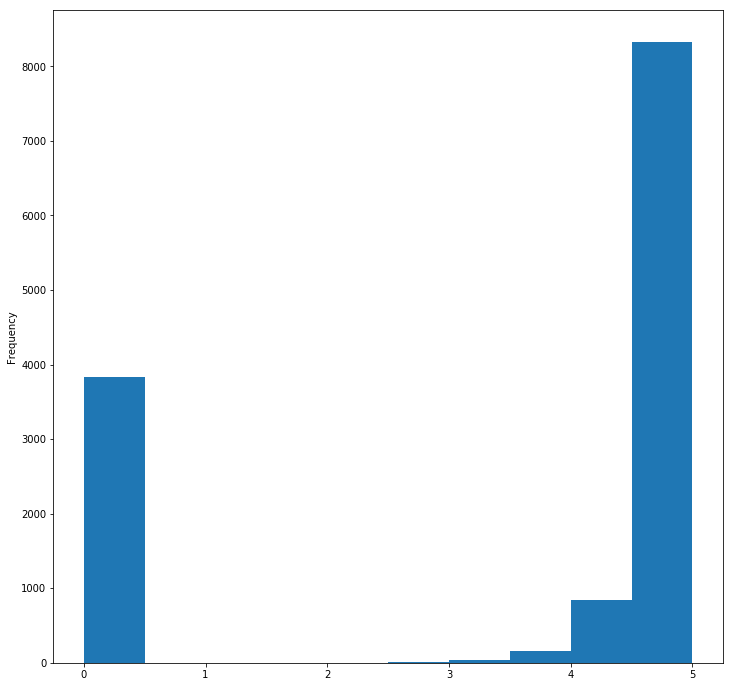

In [11]:
airbnb["overall_satisfaction"].plot.hist();

In [12]:
def numerical_variable_distribution(df, col):
    df[col].plot.kde()
    plt.xlabel('Variable "{}" Distribution'.format(col))
    plt.show()

In [13]:
numerical_columns = airbnb.select_dtypes(np.number).columns.tolist()

In [14]:
from ipywidgets import interact, fixed

In [15]:
interact(numerical_variable_distribution, 
         col=numerical_columns, df=fixed(airbnb));

interactive(children=(Dropdown(description='col', options=('room_id', 'host_id', 'overall_satisfaction', 'acco…

In [16]:
airbnb['host_id'].value_counts(normalize=True).head()

3953109      0.012923
1756107      0.007406
106149355    0.006499
2174752      0.005139
2010790      0.004761
Name: host_id, dtype: float64

Specific hosts based on their id numbers have multiple locations for rent on the service.

In [17]:
from scipy import stats

In [18]:
def numerical_variable_normality(col):
    stats.probplot(airbnb[col], plot=plt)
    plt.xlabel('Probability plot for variable {}'.format(col))
    plt.show()

In [19]:
interact(numerical_variable_normality, col=numerical_columns);

interactive(children=(Dropdown(description='col', options=('room_id', 'host_id', 'overall_satisfaction', 'acco…

In [20]:
for num_col in numerical_columns:
    _, pval = stats.normaltest(airbnb[num_col][airbnb[num_col].notnull()])
    if(pval < 0.05):
        print("Column {} doesn't follow a normal distribution".format(num_col))

Column room_id doesn't follow a normal distribution
Column host_id doesn't follow a normal distribution
Column overall_satisfaction doesn't follow a normal distribution
Column accommodates doesn't follow a normal distribution
Column bedrooms doesn't follow a normal distribution
Column price doesn't follow a normal distribution


Categorical variable distribution

In [21]:
def categorical_variable_distribution(col):
    airbnb[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()

In [22]:
categorical_columns = airbnb.select_dtypes(
    ['object', 'category']).columns.tolist()

In [23]:
interact(categorical_variable_distribution, col=categorical_columns);

interactive(children=(Dropdown(description='col', options=('room_type', 'neighborhood', 'area_popularity', 'pr…

Conclusions:
-No numerical variables follow a normal distribution.

-Most entries have either poor reviews or no reviews, meaning that it is new or has never been purchased.

-The two most popular neighborhoods are Santa Maria Maior and Misericordia, which both have about 20% of places for rent.

-A great majority of places accomodate between 1 and 5 individuals.